In [1]:
!pip install ffn


<AxesSubplot:xlabel='Date'>

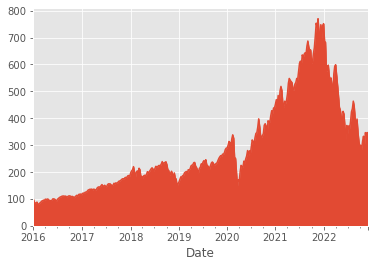

In [43]:
import matplotlib.pyplot as plt
import ffn
import numpy as np
%matplotlib inline

#########################
#init
prices = ffn.get("QQQ,QLD,TQQQ,SPY,SSO,SPXL",start='2016-01-01',end='2022/12/01' )
#2330.TW,0050.TW,^TWII,SPY,QQQ,SPXL
#########################

plt.style.use("ggplot")
(prices.rebase().mean(axis=1).resample('1W').last()).plot.area()

# 資產分布

<AxesSubplot:xlabel='Date'>

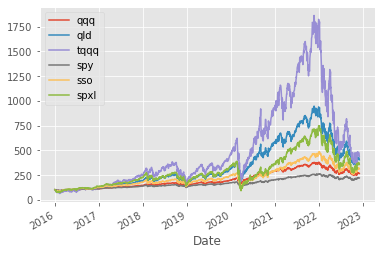

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


strategies = {}

len(prices.columns)
asset_per = np.zeros((int(len(prices.columns)),int(len(prices.columns))), dtype=float)

for num in range(0,len(prices.columns)) :
    asset_per[num][num] = 1 
    strategies[prices.columns[num]] = (prices.rebase() * asset_per[num]).mean(axis=1).rebase()

strategies = pd.DataFrame(strategies)
strategies.plot()


# 計算stats

In [41]:
stats = strategies.calc_stats()
stats = pd.DataFrame(
    {
        name:pd.Series({key:getattr(pf, key) for key in dir(pf) if isinstance(getattr(pf, key), float)}, name=name) 
        for name,pf in stats.items()
    }).transpose()

stats.columns

Index(['avg_down_month', 'avg_drawdown', 'avg_drawdown_days', 'avg_up_month',
       'best_day', 'best_month', 'best_year', 'cagr', 'calmar', 'daily_kurt',
       'daily_mean', 'daily_sharpe', 'daily_skew', 'daily_sortino',
       'daily_vol', 'five_year', 'incep', 'max_drawdown', 'monthly_kurt',
       'monthly_mean', 'monthly_sharpe', 'monthly_skew', 'monthly_sortino',
       'monthly_vol', 'mtd', 'one_year', 'pos_month_perc', 'rf', 'six_month',
       'ten_year', 'three_month', 'three_year', 'total_return',
       'twelve_month_win_perc', 'win_year_perc', 'worst_day', 'worst_month',
       'worst_year', 'yearly_kurt', 'yearly_mean', 'yearly_sharpe',
       'yearly_skew', 'yearly_sortino', 'yearly_vol', 'ytd'],
      dtype='object')

# 結果展現

年化報酬
qqq     0.150931
qld     0.223310
tqqq    0.237909
spy     0.119979
sso     0.178198
spxl    0.201401
Name: cagr, dtype: float64
最大回撤:
qqq    -0.351187
qld    -0.628924
tqqq   -0.806368
spy    -0.337173
sso    -0.593411
spxl   -0.768561
Name: max_drawdown, dtype: float64


"\nIndex(['avg_down_month', 'avg_drawdown', 'avg_drawdown_days', 'avg_up_month',\n       'best_day', 'best_month', 'best_year', 'cagr', 'calmar', 'daily_kurt',\n       'daily_mean', 'daily_sharpe', 'daily_skew', 'daily_sortino',\n       'daily_vol', 'five_year', 'incep', 'max_drawdown', 'monthly_kurt',\n       'monthly_mean', 'monthly_sharpe', 'monthly_skew', 'monthly_sortino',\n       'monthly_vol', 'mtd', 'one_year', 'pos_month_perc', 'rf', 'six_month',\n       'ten_year', 'three_month', 'three_year', 'total_return',\n       'twelve_month_win_perc', 'win_year_perc', 'worst_day', 'worst_month',\n       'worst_year', 'yearly_kurt', 'yearly_mean', 'yearly_sharpe',\n       'yearly_skew', 'yearly_sortino', 'yearly_vol', 'ytd'],\n      dtype='object')\n"

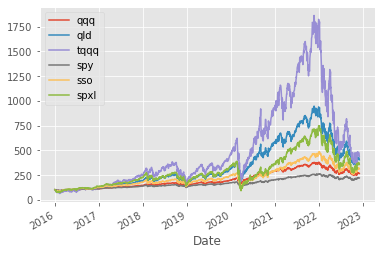

In [44]:
strategies.plot()
print("年化報酬")
print(stats.cagr)
print("最大回撤:")
print(stats.max_drawdown)
"""
Index(['avg_down_month', 'avg_drawdown', 'avg_drawdown_days', 'avg_up_month',
       'best_day', 'best_month', 'best_year', 'cagr', 'calmar', 'daily_kurt',
       'daily_mean', 'daily_sharpe', 'daily_skew', 'daily_sortino',
       'daily_vol', 'five_year', 'incep', 'max_drawdown', 'monthly_kurt',
       'monthly_mean', 'monthly_sharpe', 'monthly_skew', 'monthly_sortino',
       'monthly_vol', 'mtd', 'one_year', 'pos_month_perc', 'rf', 'six_month',
       'ten_year', 'three_month', 'three_year', 'total_return',
       'twelve_month_win_perc', 'win_year_perc', 'worst_day', 'worst_month',
       'worst_year', 'yearly_kurt', 'yearly_mean', 'yearly_sharpe',
       'yearly_skew', 'yearly_sortino', 'yearly_vol', 'ytd'],
      dtype='object')
"""